In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('../src/factcc/')

from visualization import FactCCViz

In [2]:
obj = FactCCViz('/Users/ns5kn/Documents/insight/projects/factCC/src/factcc/scripts/test_factcc_BertBaseCased.cfg')

In [3]:
import numpy
obj.load_data(clobber=True)

len(obj.dataset)
obj.dataset.head()
# len(obj.dataset)
# df  = obj.dataset
# df["label"] = df["label"].map({'SUPPORTS': numpy.int64(1) ,'REFUTES': numpy.int64(0)})
# print(obj._test_csv_path)

,Unnamed: 0,Unnamed: 0.1,idx,sentence2,label,extraction_span,backtranslation,augmentation,augmentation_span,noisy,filepath,sentence1,pred
0,0,128037,dailymail-train-c9c0c501f056aed5c232ae5d133e0d...,We can not learn a lot about them.',REFUTES,"[341, 349]",0.0,NegateSentences,"[1, 2]",NaN,cnndm/dailymail/stories/c9c0c501f056aed5c232ae...,"By Sarah Griffiths PUBLISHED: 09:59 EST, 3 Sep...",0
1,1,491755,cnn-train-b0ff7f74cfcd5b8db155054ec37165aad0c6...,They said the days were gone when consumers we...,REFUTES,"[128, 142]",0.0,PronounSwap,"[0, 0]",NaN,cnndm/cnn/stories/b0ff7f74cfcd5b8db155054ec371...,London (CNN) -- The European head of consumer ...,0
2,2,470924,cnn-train-5f3a28023ec4ddcfc29c61bf600fb9cd02cb...,I did audition for 'Theo Theo James' back in t...,REFUTES,"[166, 194]",0.0,EntitySwap,"[5, 6]",NaN,cnndm/cnn/stories/5f3a28023ec4ddcfc29c61bf600f...,(CNN) -- Lucky fans were treated to the first ...,1
3,3,470924,cnn-train-5f3a28023ec4ddcfc29c61bf600fb9cd02cb...,I did audition for 'Theo Theo James' back in t...,REFUTES,"[166, 194]",0.0,EntitySwap,"[5, 6]",NaN,cnndm/cnn/stories/5f3a28023ec4ddcfc29c61bf600f...,(CNN) -- Lucky fans were treated to the first ...,0
4,4,627432,cnn-train-5f3a28023ec4ddcfc29c61bf600fb9cd02cb...,"It will be released in on on March 21, 2014..",SUPPORTS,"[113, 124]",0.0,NaN,NaN,NaN,cnndm/cnn/stories/5f3a28023ec4ddcfc29c61bf600f...,(CNN) -- Lucky fans were treated to the first ...,1


In [56]:
df = obj.dataset
df['pred'].value_counts()


1023

In [67]:
import numpy as np
import seaborn as sns

# df = obj.dataset.query("label == 'REFUTES'").copy()
df = obj.dataset.copy()
df['pred'] = df['pred'].replace(0, 'REFUTES')
df['pred'] = df['pred'].replace(1, 'SUPPORTS')
# df['augmentation'] = df['augmentation'].replace(np.NaN, 'No augmentation')

df = df[df['label'] != df['pred']]
len(df)

# df = df[['idx', 'augmentation', 'label', 'pred']] \
#     .groupby(['augmentation', 'label', 'pred']) \
#     .count() \
#     .reset_index()

# df = df.rename(columns={'idx': 'count'})
# df
# df['agrees'] = ['red' if x == 'Z' else 'green' for x in df['Set']]


# df.reset_index()
# df.columns

# g = sns.barplot(x='count', y='augmentation', color="" data=df)

642

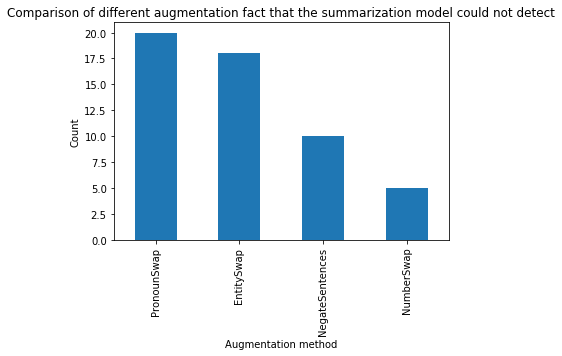

In [53]:
obj.augmentation_plot()

In [6]:
sentence_a = "A van was also hijacked in Denmark Street and pushed towards police lines. It is not yet known how serious the injuries sustained by the police officers taken to hospital are."
sentence_b = "A van was also abducted on Denmark Street and pushed in the direction of police lines."


obj.heatmap_plot(sentence_a, sentence_b, 1, 0)



ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    /opt/anaconda3/envs/factcctst/bin
    /opt/anaconda3/condabin
    /Users/ns5kn/.cargo/bin
    /usr/local/bin
    /usr/bin
    /bin
    /usr/sbin
    /sbin

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python
